### Play transforms with CIFAR-10 images

In [1]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [212]:
# Hyper parameters
batch_size = 100

### Load CIFAR-10 dataset
Can be downloaded by `torchvision.datasets`

https://pytorch.org/docs/stable/torchvision/datasets.html

In [2]:
# CIFAR-10 dataset (32x32 colour images in 10 classes)
# https://www.cs.toronto.edu/~kriz/cifar.html
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='dataset/',
                                           train=True, 
                                           transform=transform,
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='dataset/',
                                          train=False, 
                                          transform=transform,
                                          download=True)

Files already downloaded and verified
Files already downloaded and verified


In [224]:
print('Original train size:', train_dataset.train_data.shape)
print('Original test size:', test_dataset.test_data.shape)

Original train size: (50000, 32, 32, 3)
Original test size: (10000, 32, 32, 3)


### Get one sample image

In [98]:
sample_image = train_dataset.train_data[0]

In [99]:
sample_to_pil = transforms.ToPILImage()(sample_image)

In [100]:
sample_to_pil.size

(32, 32)

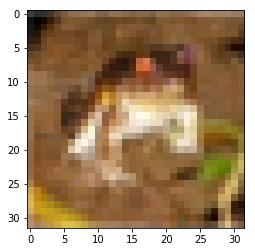

In [101]:
plt.imshow(sample_to_pil)

### Horizontal flip

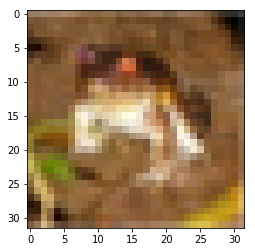

In [66]:
# Here set probability = 1 to forcedly see the result
sample_flipped = transforms.RandomHorizontalFlip(1)(sample_to_pil)
plt.imshow(sample_flipped)

### Rotation

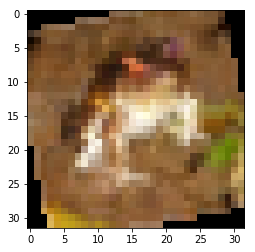

In [74]:
# randomly rotate images in the range (-degrees, +degrees)
sample_rotated = transforms.RandomRotation(degrees=15)(sample_to_pil)
plt.imshow(sample_rotated)

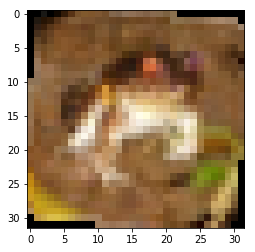

In [83]:
# randomly rotate images in the range (-degrees, +degrees)
sample_rotated_2 = transforms.RandomRotation(degrees=15)(sample_to_pil)
plt.imshow(sample_rotated_2)

### Cropping while keeping original size

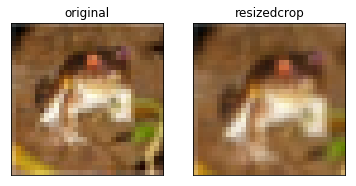

In [225]:
fig = plt.figure()

# Use original size, and set scale – range of size of the origin size cropped
sample_resized_crop = torchvision.transforms.RandomResizedCrop(size=32, scale=(0.8, 1.0))(sample_to_pil)
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
ax.set_title('original')
ax.imshow(sample_to_pil)
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
ax.set_title('resizedcrop')
ax.imshow(sample_resized_crop)


### Include tranform functions to the dataset

In [217]:
# CIFAR-10 dataset (32x32 colour images in 10 classes)
# https://www.cs.toronto.edu/~kriz/cifar.html
transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(0.5),
     transforms.RandomRotation(degrees=15),
     torchvision.transforms.RandomResizedCrop(size=32, scale=(0.8, 1.0)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='dataset/',
                                           train=True, 
                                           transform=transform,
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='dataset/',
                                          train=False, 
                                          transform=transform,
                                          download=True)

Files already downloaded and verified
Files already downloaded and verified


In [218]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

### Show dataset sample images

In [219]:
sample_train_data = iter(train_loader)
images, labels = sample_train_data.next()

In [221]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

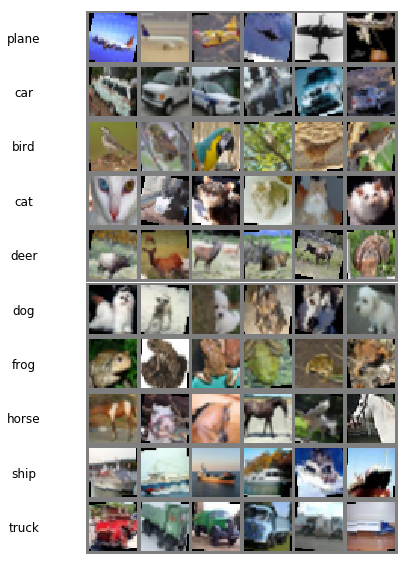

In [222]:
fig = plt.figure(figsize = (10, 10))
fig.subplots_adjust(hspace=0, wspace=0)
def show_photo(img, i, lname):
    img = img / 2 + 0.5
    npimg = img.numpy()
    ax = fig.add_subplot(10, 1, i, xticks=[], yticks=[])
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.axis('off')
    ax.set_title(label=lname, x=-0.2, y=0.3)

for label, lname in enumerate(classes):
    target_label = (labels == label)
    imgs = images[target_label][:6] # Display 6 images
    show_photo(torchvision.utils.make_grid(imgs), label + 1, lname)